<a href="https://colab.research.google.com/github/IgorMozetic/Imersoes_Alura/blob/main/Aula3_Imersao_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imersão_Dados Alura - Aula 03

Nome: Igor Mozetic

Linkedin: https://www.linkedin.com/in/igor-mozetic/

Github: https://github.com/IgorMozetic

##Primeiro passo - Importar a base de dados

In [1]:
import pandas as pd #importando a biblioteca que irá ser utilizada e dando um apelido a ela

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true' #passando a url para a variável 'url_dados'

df_dados = pd.read_csv(url_dados, compression = 'zip') #lendo a base de dados dentro de um arquivo zip e passando para a variàvel 'df_dados'
display(df_dados) #exibindo a base de dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

##Analisar a base

Antes dos desafios, vamos estudar um pouco mais sobre a nossa base de dados.

In [2]:
print(df_dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB
None


In [3]:
mapa = {'droga': 'composto'}
df_dados.rename(columns=mapa, inplace=True)
df_dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Após realizar a análise da base de dados, foi interpretado que não existem esse número tão extenso de drogas, portanto a coluna droga teve seu nome substituido para compostos, pois são pequenas moléculas que ainda estão em fase de teste para no futuro se os teste ocorrerem corretamente, tornar-se uma droga.

O comando `.info()` nos traz algumas infos sobre a nossa tabela, no caso a quantidade de linhas e colunas, os data-types que estão presentes nela e mais algumas coisas.

Agora vamos saber quais valores, a quantidade e a proporção deles em cada coluna

O comando `unique()` traz quais valores são encontrados na tabela

O comando `value_counts())` informa a quantidade que cada valor tem na coluna

O comando `value_counts(normalize = True)` informa a quantidade em forma de porcentagem

####Tratamento

In [4]:
df_dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [5]:
df_dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [6]:
df_dados['tratamento'].value_counts(normalize = True).map('{:.1%}'.format)

com_droga       92.2%
com_controle     7.8%
Name: tratamento, dtype: object

####Tempo

In [7]:
df_dados['tempo'].unique() 

array([24, 72, 48])

In [8]:
df_dados['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [9]:
df_dados['tempo'].value_counts(normalize = True).map('{:.1%}'.format)

48    34.6%
72    32.7%
24    32.6%
Name: tempo, dtype: object

###Dose

In [10]:
df_dados['dose'].unique() 

array(['D1', 'D2'], dtype=object)

In [11]:
df_dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [12]:
df_dados['dose'].value_counts(normalize = True).map('{:.1%}'.format)

D1    51.0%
D2    49.0%
Name: dose, dtype: object

###Composto

In [13]:
df_dados['composto'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [14]:
df_dados['composto'].value_counts() 

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
a90e40334       1
b3f24a171       1
8bc88a3be       1
f19d8c43b       1
67c4672f3       1
Name: composto, Length: 3289, dtype: int64

In [15]:
df_dados['composto'].value_counts(normalize = True).map('{:.1%}'.format)

cacb2b860    7.8%
87d714366    3.0%
9f80f3f77    1.0%
8b87a7a83    0.9%
5628cb3ee    0.8%
             ... 
a90e40334    0.0%
b3f24a171    0.0%
8bc88a3be    0.0%
f19d8c43b    0.0%
67c4672f3    0.0%
Name: composto, Length: 3289, dtype: object

Em tratamento, tempo e doses, há um número pequeno de variantes de valores, porém em droga existe um número maior

###Gráficos



####Pizza

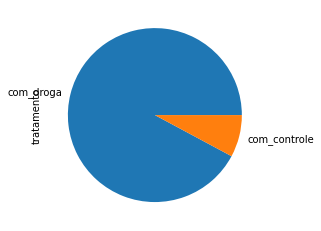

In [16]:
df_dados['tratamento'].value_counts().plot.pie()

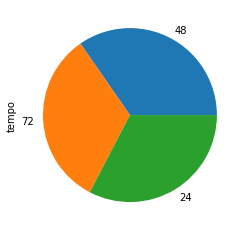

In [17]:
df_dados['tempo'].value_counts().plot.pie()

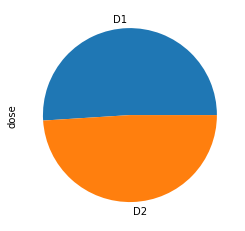

In [18]:
df_dados['dose'].value_counts().plot.pie()

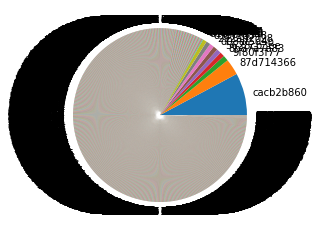

In [19]:
df_dados['composto'].value_counts().plot.pie()

Percebe-se que ao realizar os gráfico em gráfico de pizza, a análise dos mesmos não da para ser exata e pode até ocorre erros.

####Barra

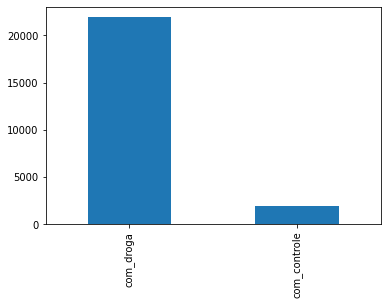

In [20]:
df_dados['tratamento'].value_counts().plot.bar()

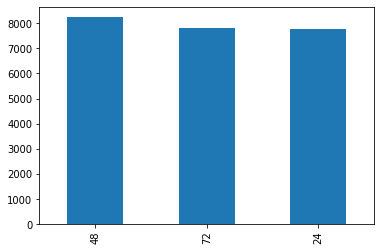

In [21]:
df_dados['tempo'].value_counts().plot.bar()

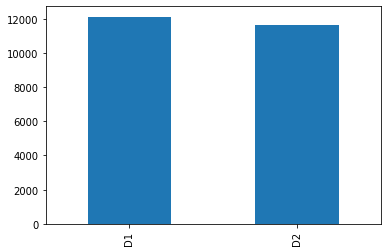

In [22]:
df_dados['dose'].value_counts().plot.bar()

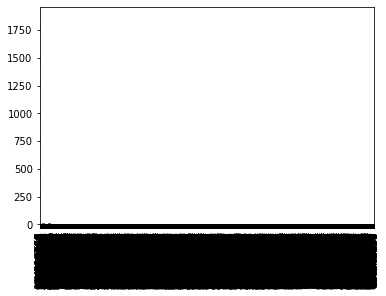

In [23]:
df_dados['composto'].value_counts().plot.bar()

Percebe-se que ao realizar os gráfico em gráfico de barra, a análise dos mesmos é bem mais exata comparando aos de Pizza

##Desafio 01: Criar tabelas de frequência com pandas.groupby()

In [24]:
df_dados.groupby(['tempo', 'dose'] )['tratamento'].value_counts().unstack()

tratamento  com_controle  com_droga
tempo dose                         
24    D1             301       3585
      D2             305       3581
48    D1             343       4011
      D2             305       3591
72    D1             307       3600
      D2             305       3580

In [25]:
df_dados.groupby(['dose', 'tempo'] )['tratamento'].value_counts().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [26]:
df_dados.groupby(['tratamento', 'tempo'] )['dose'].value_counts().unstack()

dose                  D1    D2
tratamento   tempo            
com_controle 24      301   305
             48      343   305
             72      307   305
com_droga    24     3585  3581
             48     4011  3591
             72     3600  3580

In [27]:
df_dados.groupby(['tempo', 'tratamento'] )['dose'].value_counts().unstack()

dose                  D1    D2
tempo tratamento              
24    com_controle   301   305
      com_droga     3585  3581
48    com_controle   343   305
      com_droga     4011  3591
72    com_controle   307   305
      com_droga     3600  3580

In [28]:
df_dados.groupby(['dose', 'tratamento'] )['tempo'].value_counts().unstack()

tempo                24    48    72
dose tratamento                    
D1   com_controle   301   343   307
     com_droga     3585  4011  3600
D2   com_controle   305   305   305
     com_droga     3581  3591  3580

In [29]:
df_dados.groupby(['tratamento', 'dose'] )['tempo'].value_counts().unstack()

tempo                24    48    72
tratamento   dose                  
com_controle D1     301   343   307
             D2     305   305   305
com_droga    D1    3585  4011  3600
             D2    3581  3591  3580

Nessa parte do código, podemos notar que foi plotado todas as df que poderiam serem combinadas dentro dessas três colunas a partir do groupby (função do pandas).

O comando `unstack()` dinamiza os dados fazendo com que ele se tornem uma df.


In [30]:
df_dados.groupby(['tempo', 'dose'] )['tratamento'].value_counts().unstack(level=0)

tempo                24    48    72
dose tratamento                    
D1   com_controle   301   343   307
     com_droga     3585  4011  3600
D2   com_controle   305   305   305
     com_droga     3581  3591  3580

In [31]:
df_dados.groupby(['tempo', 'dose'] )['tratamento'].value_counts().unstack(level=1)

dose                  D1    D2
tempo tratamento              
24    com_controle   301   305
      com_droga     3585  3581
48    com_controle   343   305
      com_droga     4011  3591
72    com_controle   307   305
      com_droga     3600  3580

In [32]:
df_dados.groupby(['tempo', 'dose'] )['tratamento'].value_counts().unstack(level=2)

tratamento  com_controle  com_droga
tempo dose                         
24    D1             301       3585
      D2             305       3581
48    D1             343       4011
      D2             305       3591
72    D1             307       3600
      D2             305       3580

In [33]:
df_dados.groupby(['tempo', 'dose'] )['tratamento'].value_counts().unstack(level=-1)

tratamento  com_controle  com_droga
tempo dose                         
24    D1             301       3585
      D2             305       3581
48    D1             343       4011
      D2             305       3591
72    D1             307       3600
      D2             305       3580

Ao passarmos por parâmetro `level=0`, as ordens da coluna a serem plotadas muda, como se elas girassem em sentido horário, ou seja, a primeira coluna agora apresenta os dados, a segunda coluna passa a ser a primeira e a coluna que apresentava os dados passa a ser a segunda.

Caso for passado `level=1`, apenas a segunda coluna muda de lugar com a coluna que apresentava os dados.

E caso for passado `level=2` ou `level=-1`, a df se apresenta da forma em que foi digitada no código.

In [34]:
df_dados.groupby(['dose', 'tempo'] )['tratamento'].value_counts(normalize=True).map('{:.1%}'.format).unstack()

tratamento com_controle com_droga
dose tempo                       
D1   24            7.7%     92.3%
     48            7.9%     92.1%
     72            7.9%     92.1%
D2   24            7.8%     92.2%
     48            7.8%     92.2%
     72            7.9%     92.1%

In [35]:
df_dados.groupby(['tempo', 'dose'] )['tratamento'].value_counts(normalize='index').map('{:.1%}'.format).unstack()

tratamento com_controle com_droga
tempo dose                       
24    D1           7.7%     92.3%
      D2           7.8%     92.2%
48    D1           7.9%     92.1%
      D2           7.8%     92.2%
72    D1           7.9%     92.1%
      D2           7.9%     92.1%

Neste código podemos notar que os números agora se tronaram porcentagens, de acordo com o índice e de acordo com a coluna.

##Desafio 02: Normalizar o crosstab pela coluna.

In [36]:
pd.crosstab([df_dados['dose'], df_dados['tempo']],  df_dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [37]:
pd.crosstab([df_dados['dose'], df_dados['tempo']],  df_dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

No código acima podemos perceber que com o mesmo código, mudando apenas o tipo de normalizar, nós conseguimos fazer de duas maneiras:

`normalize='columns'` normaliza na coluna, ou seja, ele considera a soma da tabela para normalizar

`normalize='index'` normaliza no index da tabela, na linha, ou seja, ele considera a soma de todas as linhas para normalizar

##Desafio 03: Explorar outros agregadores.

In [38]:
pd.crosstab([df_dados['dose'], df_dados['tempo']], df_dados['tratamento'], values=df_dados['g-10'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            4.268      4.166
     48            2.845      6.499
     72            1.820      9.103
D2   24            4.862     10.000
     48            4.983      5.612
     72            3.465      6.958

No código com a função `aggfunc='max'` achamos o maior número de cada especificação

In [39]:
pd.crosstab([df_dados['dose'], df_dados['tempo']], df_dados['tratamento'], values=df_dados['g-10'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.192     -8.754
     48           -3.631     -9.394
     72           -4.422     -9.281
D2   24           -1.823     -9.267
     48           -1.681     -8.367
     72           -3.135    -10.000

No código com a função `aggfunc='min'` achamos o menor número de cada especificação

In [40]:
pd.crosstab([df_dados['dose'], df_dados['tempo']], df_dados['tratamento'], values=df_dados['g-10'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.096975  -0.175919
     48        -0.130571  -0.231525
     72        -0.546689  -0.194789
D2   24         0.383789  -0.056772
     48         0.156669  -0.093733
     72         0.073074  -0.039107

No código com a função `aggfunc='mean'` achamos a média dos números de cada especificação

In [41]:
df_dados.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

In [42]:
pd.crosstab([df_dados['dose'], df_dados['tempo']], df_dados['tratamento'], values=df_dados['g-10'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.762349   1.277986
     48         1.018892   1.379758
     72         0.785458   1.302421
D2   24         1.176269   1.307294
     48         0.919721   1.232862
     72         0.933261   1.356731

No código com a função `aggfunc='std'` achamos o desvio padrão dos números de cada especificação

In [43]:
pd.crosstab([df_dados['dose'], df_dados['tempo']], df_dados['tratamento'], values=df_dados['g-10'], aggfunc='count')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

No código com a função `aggfunc='count'` achamos a quantidade dos números de cada especificação

In [44]:
pd.crosstab([df_dados['dose'], df_dados['tempo']], df_dados['tratamento'], values=df_dados['g-10'], aggfunc='median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           0.0766    0.03780
     48          -0.0935    0.05490
     72          -0.4923    0.05595
D2   24           0.1694   -0.00140
     48           0.0575    0.05990
     72           0.0106    0.07150

No código com a função `aggfunc='median'` achamos a mediana  dos números, 50% de cada especificação

In [45]:
pd.crosstab([df_dados['dose'], df_dados['tempo']], df_dados['tratamento'], values=df_dados['g-10'], aggfunc='first')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.2479     1.1830
     48           0.2856    -0.4797
     72          -0.5951    -1.1520
D2   24          -0.0438     5.1340
     48          -0.3817    -0.1618
     72          -1.5940    -0.2219

No código com a função `aggfunc='first'` achamos o primeiro valor  dos números de cada especificação

In [46]:
pd.crosstab([df_dados['dose'], df_dados['tempo']], df_dados['tratamento'], values=df_dados['g-10'], aggfunc='last')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.6127     0.5742
     48           1.8330     0.4151
     72          -0.7182     1.9460
D2   24           0.6321    -0.1851
     48          -0.1854     0.3666
     72           1.3820     0.0615

No código com a função `aggfunc='last'` achamos o último valor  dos números de cada especificação

In [47]:
pd.crosstab([df_dados['dose'], df_dados['tempo']], df_dados['tratamento'], values=df_dados['g-10'], aggfunc='sum')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          29.1894  -630.6683
     48         -44.7857  -928.6470
     72        -167.8336  -701.2411
D2   24         117.0556  -203.2994
     48          47.7841  -336.5958
     72          22.2877  -140.0031

No código com a função `aggfunc='sum'` achamos a soma dos valores  dos números de cada especificação

##Desafio 04: Explorar o melt.

`melt` é utilizado para transfromar ou remodelar uma df. Ele é um comando dentro da biblioteca do pandas, portanto é necessário ter o `pd.melt()`.

O primeiro parametro/argumento no qual você irá passar para dentro dos parênteses será o seu df, o segundo argumento/parâmetro irá ser o 'id-vars' que é a linha que você deseja, ou seja, no eixo=0 (axis=0). è a coluna na qual você não deseja mexer, apenas vai utilizar os dados da mesma maneira que já está sendo apresentada. As demais colunas agora passam a serem linhas.

`df_dados1=pd.melt(df_dados, id_vars=[''])`

Você também pode filtrar o seu df utilizando o `df_dados[df_dados['variable']=='nome que deseja filtrar']`.

Você também consegue mudar os nomes das colunas 'variables' e 'values' caso queira, basta acrescentar amsi argumentos ` var_name = '' , value_name = ''`

In [48]:
df_melt = df_dados.groupby(by = ['tratamento', 'tempo', 'dose' ])['tempo'].count().unstack()
df_melt

dose                  D1    D2
tratamento   tempo            
com_controle 24      301   305
             48      343   305
             72      307   305
com_droga    24     3585  3581
             48     4011  3591
             72     3600  3580

In [49]:
df1 = df_melt.melt(value_name='quantidade')
df1

,dose,quantidade
0,D1,301
1,D1,343
2,D1,307
3,D1,3585
4,D1,4011
5,D1,3600
6,D2,305
7,D2,305
8,D2,305
9,D2,3581


In [50]:
df1[df1['dose']=='D1']

,dose,quantidade
0,D1,301
1,D1,343
2,D1,307
3,D1,3585
4,D1,4011
5,D1,3600


In [51]:
df1[df1['quantidade']>3000]

,dose,quantidade
3,D1,3585
4,D1,4011
5,D1,3600
9,D2,3581
10,D2,3591
11,D2,3580


Como podemos ver, conseguimos realizar vários filtros de acordo com a preferência de quais dados são desejados realziar a análise.

##Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

In [52]:
ge = df_dados[df_dados['dose']=='D1'].loc[:,'g-0':'g-29']
ce = df_dados[df_dados['dose']=='D1'].loc[:,'c-0':'c-29']
gece = pd.concat([ge,ce], axis = 1)
gece

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,-0.0600,0.1083,0.6864,0.4043,0.4213,-0.6797,0.2888,0.4323,-0.3381,0.3407,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687,0.5196,0.1594,0.8920,0.6485,0.6078
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,0.0927,0.2723,0.2772,0.7776,0.3679,0.5696,0.2835,1.4080,0.3745,0.6775,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164,0.1759,0.6654,0.3556,0.8175,0.0474
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-0.1312,-1.4640,0.3394,-1.7790,0.2188,0.5826,-0.7513,0.0543,0.7182,-0.4159,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216,-1.1380,0.3668,-1.0620,-0.7736,0.6225
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.3998,-4.5520,-2.7350,-1.9630,-2.8610,-1.2670,-2.5830,-0.5036,-3.1590,-1.8510,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360,-1.6890,-4.4990,-1.5190,-2.2730,-0.3250
5,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,0.0543,-0.2225,-0.1586,0.4289,0.0361,0.3543,0.8310,-0.9129,0.7677,-0.2512,0.7087,0.0481,-0.4486,1.2570,1.2550,0.3359,-0.5103,-0.2993,-1.1950,-0.3208,-0.1187,1.0030,0.9133,0.0376,0.0877,1.0270,0.4862,0.7869,0.7077,0.4424,1.3340,0.8581,1.1010,1.1040,2.0660,1.2770,0.5574,1.0550,-0.1912,0.9538,1.7300,1.4360,0.3695,0.2321,1.3980,1.6140,1.2050,1.4210,1.0800,0.3913,1.1830,0.6052,1.4090,1.3310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23804,-1.0140,0.1709,-0.4291,1.8750,0.9859,0.3009,0.0650,-1.3920,-1.0410,1.4790,-0.4459,0.7377,-0.0037,-0.0995,-0.2393,-1.1670,-0.9359,1.1260,0.3450,-1.0780,2.7230,0.5255,0.6368,0.0000,-0.1172,0.8256,0.2120,2.1500,0.5925,-0.7637,-0.1613,-1.3570,0.1876,0.8188,-0.2628,-0.0806,-1.4010,-1.0320,-1.3270,0.4764,-0.3193,-1.4510,-0.6881,-1.3340,0.4649,-3.5660,-0.0523,0.1184,-1.8560,-0.1902,-0.7193,0.4886,-0.9022,0.2909,-1.5360,-1.5500,-0.0236,-2.8530,-0.0280,-0.5339
23807,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.1430,0.7335,1.0790,0.2862,0.3289,0.3053,0.1776,0.7305,-0.0701,0.0923,0.8327,-0.1161,-0.8597,-0.1366,0.8257,0.4983,0.8213,-0.3165,0.4247,1.0050,0.5356,0.7108,-0.1090,0.0154,1.1670,0.9205,0.5602,0.6046,0.8405,0.3697
23808,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.9538,-0.8733,-0.2969,-0.7964,0.2447,-0.1552,-0.2402,-0.3265,-0.1232,0.6442,0.0523,0.1678,

Nesse trecho de código, foi realizado a alocação dos intervalos localizados em certos intervalos de tempo de g e de c que atendiam a condição imposta `df_dados[df_dados['dose']=='D1']`.

Logo após `gece = pd.concat([ge,ce], axis = 1)` as duas varíaveis com o interalo de g e de c se juntaram em uma única varíavel 

In [53]:
gece_corr = gece.corr()
corr_filtrada = gece_corr.loc[:'g-29','c-0':]

Nesse techo foi passado as correlações entre os dois para a váriavel corr_filtrada `corr_filtrada = gece_corr.loc[:'g-29','c-0':]`

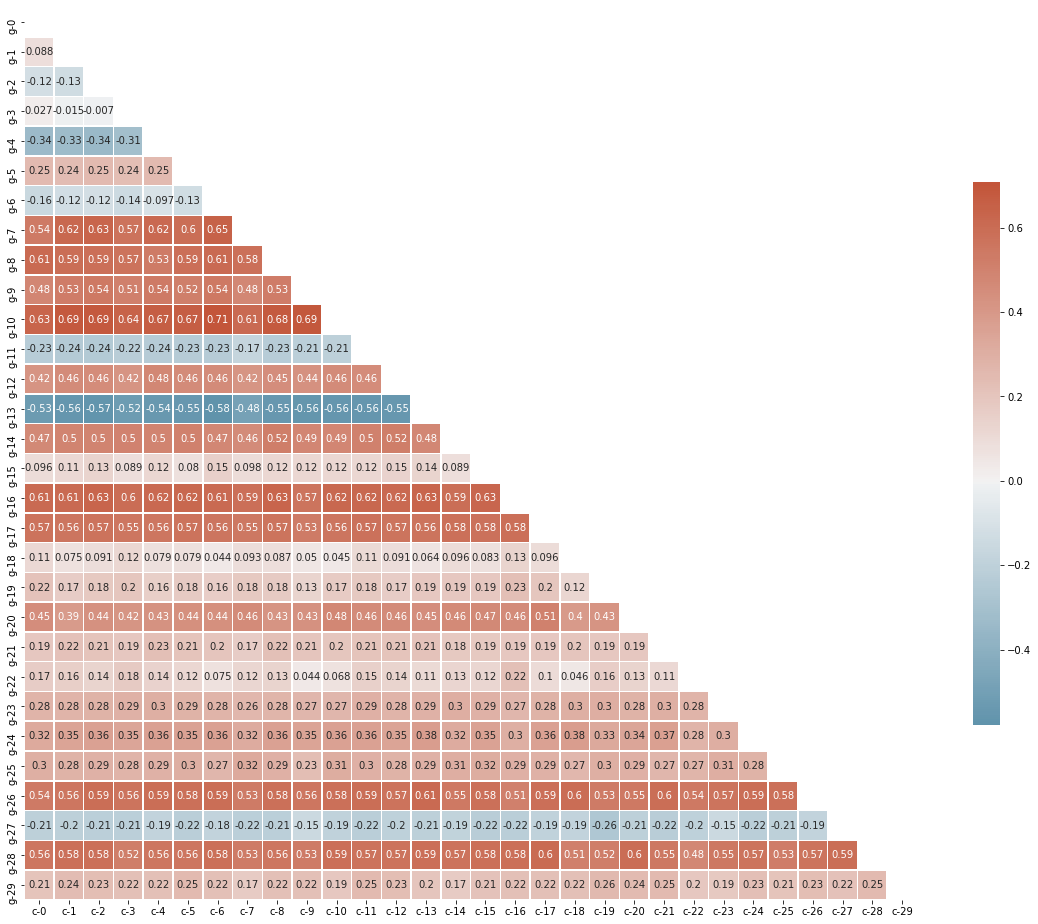

In [54]:
# Generate a mask for the upper triangle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mask = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_filtrada, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

Nesse trecho de código é a criação e a estilização do gráfico heatmap que é um gráfico de calor, quanto mais próximo do 1, mais proporcional, quando mais perto do -1 mais inversamente proporcional

####Efeitos biológicos
Quanto maior a relação entre os genes e a viabilidade, mais vermelho os quadrados ficam, quanto menor a relação, mais azuis ficam.

De modo geral, esses genes não estão correspondendo de forma muito correlativa e nem não correlativa, pode-se dizer que não estão envolvidos e reagindo da maneira que o resultado esperava que eles reagissem. Isso faz com que eles sejam descartados.

##Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

**Importação da bibliotecas que irão ser utilizadas no código**
```
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```
**Nessa parte do código está sendo criada uma máscara para colocar na parte da diagonalsuperio direita para cobrir e o mapa de calor ficar apenas com um triângulo na parte diagonal inferior direta do mapa.**

`mask = np.triu(np.ones_like(corr_filtrada, dtype=bool))`

**Nessa parte do código está sendo dito qual irá ser o tamanho da figura**

`f, ax = plt.subplots(figsize=(20, 20))`

**Nessa parte do código o mapa de cores está sendo gerado**

`cmap = sns.diverging_palette(230, 20, as_cmap=True)`

**Nessa parte, está sendo desenhado o mapa de calor com todas as customizações, entre elas a mascara, qual irá ser a base de dados que irá ser utilizada para a realização do mapa, o centro do mapa, as linhas, a largura dos quadrados, a formatação das barras informativas ao lado direito do mapa**
```
sns.heatmap(corr_filtrada, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
```

##Desafio 07: Resumo do que você aprendeu com os dados

A aula3 foi uma aula muito produtiva, porém sinto que não entendi e não consegui realizar o eercício 5 de forma clara na inha cabeça, tive que copiar dos resultados no discord, vou estudar mais e ver se consigo entender melhor. Porém tirando esse desafio de resto foi ótimo, muitos aprendizados e coisas novas, como por exemplo:
*   Aprendi sobre o `crosstab`, `groupby` e `melt`;
*   Aprendi a normalizar pelo index e pela coluna;
*   Aprendi os argumentos `value` e `aggfunc` e seus valores;
*   O gráfico Scatterplot que são vários pontos de acordo com os valores;
*   O gráfico lmplot e como trocar a cor da linha;
*   Separar os gráficos por colunas e linhas da tabela;
*   Aprendi também a correlacionar `corr()`;
*   O gráfico de calor, `heatmap()`;
*   O comando `unstack()` e seus níveis;
*   Os diferentes tipos de agregadores;
*   Aprendi a filtrar dados no melt;

E também os conheicmentos biólogicos:
*   O c significa viabilidade, ou seja, se a célula permanece viva ou se a célula já morreu;

Acredito que no dia de hoje foi basicamente isso!
